In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt


In [325]:
img_iseg = nib.load("/Users/pierre-luc-delisle/Data/Direct/iSEG/Training/T1/subject-1-T1.nii").get_fdata().transpose(2, 1, 0)
img_mrbrains = nib.load("/Users/pierre-luc-delisle/Data/Direct/MRBrainS/DataNii/TrainingData/1/T1_1mm.nii").get_fdata().transpose(2, 1, 0)

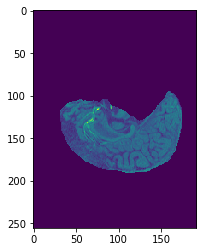

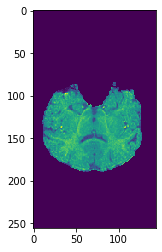

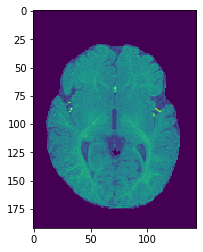

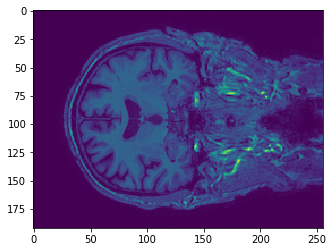

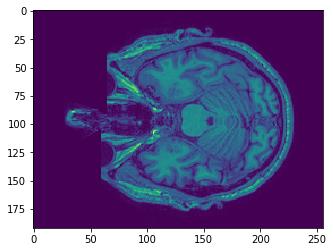

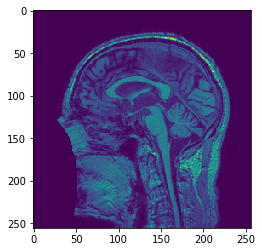

In [326]:
img_iseg_transformed = img_iseg
plt.imshow(img_iseg_transformed[:, :, 72])
plt.show()
plt.imshow(img_iseg_transformed[:, 96, :])
plt.show()
plt.imshow(img_iseg_transformed[128, :, :])
plt.show()

img_mrbrains_transformed = img_mrbrains
plt.imshow(img_mrbrains_transformed[:, :, 128])
plt.show()
plt.imshow(img_mrbrains_transformed[:, 128, :])
plt.show()
plt.imshow(img_mrbrains_transformed[96, :, :])
plt.show()

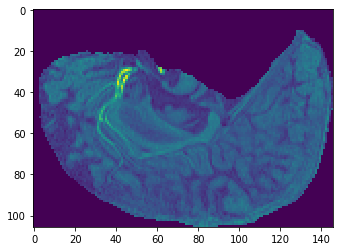

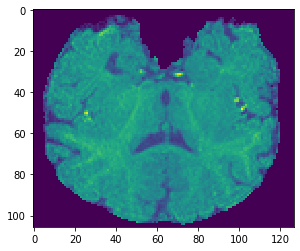

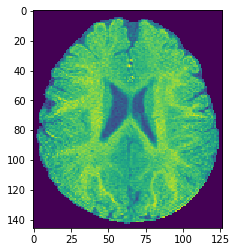

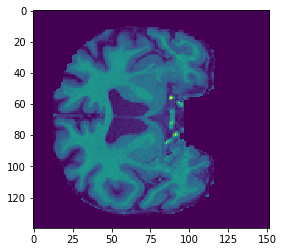

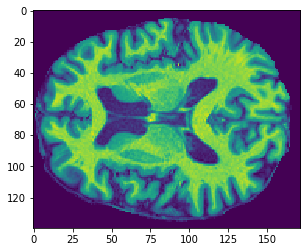

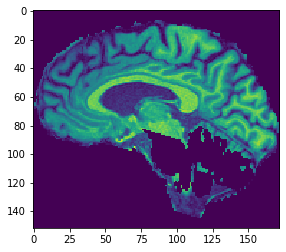

In [327]:
img_iseg = nib.load("/Users/pierre-luc-delisle/Data/Preprocessed/iSEG/Normalized/T1/subject-1-T1.nii").get_fdata().transpose(3, 2, 1, 0)
img_mrbrains = nib.load("/Users/pierre-luc-delisle/Data/Preprocessed/MRBrainS/Normalized/1/T1_1mm.nii").get_fdata().transpose(3, 2, 1, 0)

img_iseg_transformed = img_iseg.squeeze(0)
plt.imshow(img_iseg_transformed[:, :, 64])
plt.show()
plt.imshow(img_iseg_transformed[:, 64, :])
plt.show()
plt.imshow(img_iseg_transformed[64, :, :])
plt.show()

img_mrbrains_transformed = img_mrbrains.squeeze(0)
plt.imshow(img_mrbrains_transformed[:, :, 64])
plt.show()
plt.imshow(img_mrbrains_transformed[:, 64, :])
plt.show()
plt.imshow(img_mrbrains_transformed[64, :, :])
plt.show()


In [328]:
img_mrbrains_transformed_ = img_mrbrains.transpose(0, 2, 3, 1)

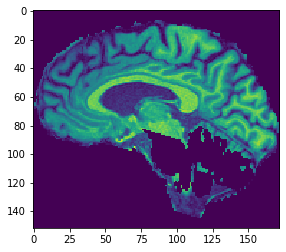

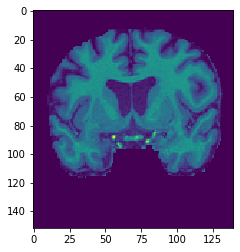

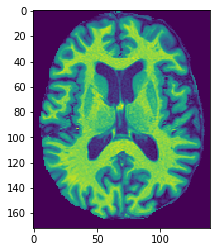

In [329]:
plt.imshow(img_mrbrains_transformed_[:, :, :, 64].squeeze(0))
plt.show()
plt.imshow(img_mrbrains_transformed_[:, :, 64, :].squeeze(0))
plt.show()
plt.imshow(img_mrbrains_transformed_[:, 64, :, :].squeeze(0))
plt.show()

In [330]:
img_iseg_transformed_ = np.fliplr(img_iseg.transpose(0, 1, 2, 3))

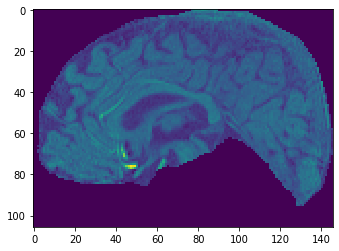

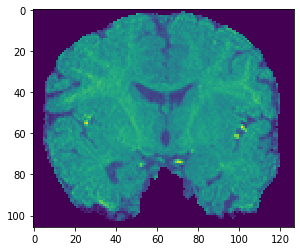

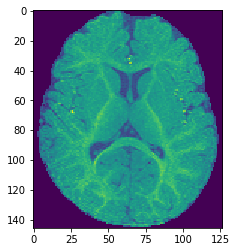

In [331]:
plt.imshow(img_iseg_transformed_[:, :, :, 127//2].squeeze(0))
plt.show()
plt.imshow(img_iseg_transformed_[:, :, 64, :].squeeze(0))
plt.show()
plt.imshow(img_iseg_transformed_[:, 106//2, :, :].squeeze(0))
plt.show()

In [333]:
img_iseg = nib.load("/Users/pierre-luc-delisle/subject-9-T1.nii").get_fdata().transpose(3, 2, 1, 0).squeeze(0)
img_mrbrains = nib.load("/Users/pierre-luc-delisle/T1.nii").get_fdata().transpose(3, 2, 1, 0).squeeze(0)


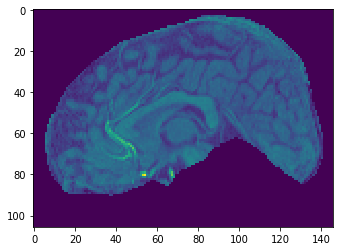

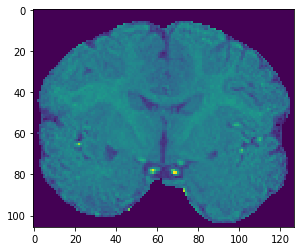

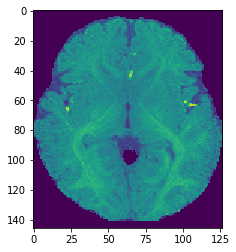

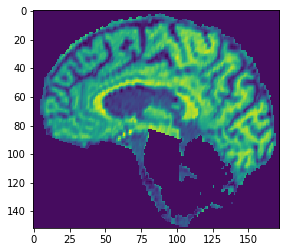

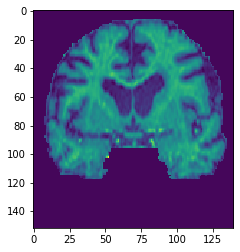

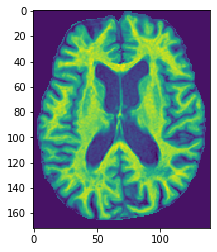

In [334]:
img_iseg_transformed = img_iseg
plt.imshow(img_iseg_transformed[:, :, 64])
plt.show()
plt.imshow(img_iseg_transformed[:, 64, :])
plt.show()
plt.imshow(img_iseg_transformed[64, :, :])
plt.show()

img_mrbrains_transformed = img_mrbrains
plt.imshow(img_mrbrains_transformed[:, :, 64])
plt.show()
plt.imshow(img_mrbrains_transformed[:, 64, :])
plt.show()
plt.imshow(img_mrbrains_transformed[64, :, :])
plt.show()